In [53]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn
seaborn.set(style="ticks")

## Dataset Description

### Dataset description

X -> X coordinate in grid<br/><br/>
Y -> Y coordinate in grid<br/><br/>
V1 -> Ocurrences of volcanic rock type 1 in cell coordinate (X,Y)<br/><br/>
V2 -> Ocurrences of volcanic rock type 2 in cell coordinate (X,Y)<br/><br/>
V3 -> Ocurrences of volcanic rock type 3 in cell coordinate (X,Y)<br/><br/>
V4 -> Ocurrences of volcanic rock type 4 in cell coordinate (X,Y)<br/><br/>
V5 -> Ocurrences of volcanic rock type 5 in cell coordinate (X,Y)<br/><br/>
VMS Deposits -> VMS Deposit in cell coordinate (X,Y)<br/><br/>

### Rock types (obtained by superimposing a grid over the geological map)

V1 -> Lower Silurian felsic volcanics<br/><br/>
V2 -> Middle-Uper Ordovician mixed (felsic - mafic) volcanics<br/><br/>
V3 -> Lower Ordovician mafic volcanics<br/><br/>
V4 -> Lower Ordovician mixed volcanics<br/><br/>
V5 -> Cambrian mafic volcanics<br/><br/>




In [1]:
df = pd.read_excel("deposits.xlsx")

<IPython.core.display.Javascript object>

In [55]:
df.head()

,X,Y,V1,V2,V3,V4,V5,VMS Deposits
0,24,47,0,0,0,44,0,0
1,24,48,56,0,0,81,0,0
2,24,49,161,0,0,23,0,0
3,24,50,24,0,0,45,0,0
4,24,51,62,0,0,22,0,0


In [59]:
df.describe()

,X,Y,V1,V2,V3,V4,V5,VMS Deposits
count,60.00000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,27.15000,49.383333,40.766667,72.366667,52.800000,14.083333,11.200000,0.416667
std,2.12192,2.511611,80.000290,115.416852,101.381441,40.514192,42.570301,0.849560
min,24.00000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.00000,47.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.00000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,29.00000,51.250000,39.250000,133.250000,60.250000,0.000000,0.000000,0.250000
max,31.00000,53.000000,317.000000,378.000000,394.000000,219.000000,254.000000,4.000000


## Dataset visualization

In [56]:
def plot_grid(df=df, x="X", y="Y", hue="VMS Deposits"):
    """Plot facet grid of X,Y and associated deposits, count of volcanic rocks by type
    
    """
    dfcop = df.copy()
    dfcop.sort_values(by=[hue])
    fg = seaborn.FacetGrid(data=dfcop, hue=hue, palette="viridis", aspect=1.61)
    fg.map(plt.scatter, x, y).add_legend()
    fg.fig.suptitle(f'{hue} by Cell Coordinate')
    fg.set(ylim=(42, 55))
    fg.set(xlim=(22, 33))

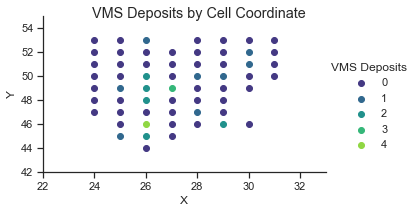

In [57]:
plot_grid()

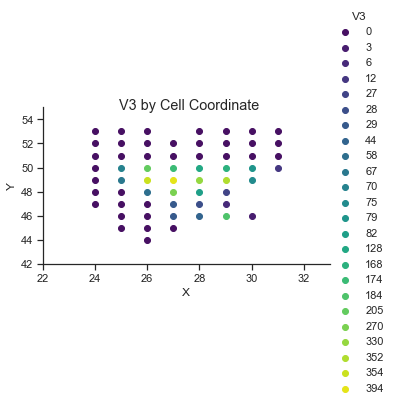

In [58]:
plot_grid(hue="V3")

## Dataset Division into train and test

In [108]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]


In [109]:
print(len(train))
print(len(test))

48
12


## Linear Regression

In [118]:
from sklearn.linear_model import LinearRegression

def lsRegression(X="V1"):
    """Performs lsRegression to columns in DataFrame
    """
    # convert columns to np.array
    X = df[X].values.reshape(-1,1)
    Y = df["VMS Deposits"].values.reshape(-1,1)

    # Performing ordinary least square regression
    linear_regressor = LinearRegression() 
    linear_regressor.fit(X, Y)
    Y_pred = linear_regressor.predict(X)
    score, coeficient, intercept = linear_regressor.score(X, Y), linear_regressor.coef_, linear_regressor.intercept_
    return Y_pred, score, coeficient, intercept

def plotLSR(X, Y, Y_pred):
    """Plots Linear Square Regression of Y_pred
    """

In [119]:
Y_preds = {}
scores = []
coeficients = []
intercepts = []
for i in ["V1", "V2", "V3", "V4", "V5"]:
    Y_pred, score, coeficient, intercept = lsRegression(i)
    Y_preds[i] = Y_pred
    scores.append(score)
    coeficients.append(coeficient)
    intercepts.append(intercept)



Text(0.5, 0.98, 'Linear Regression of 5 Volcanic Rock Types vs Presence of VMS Deposits')

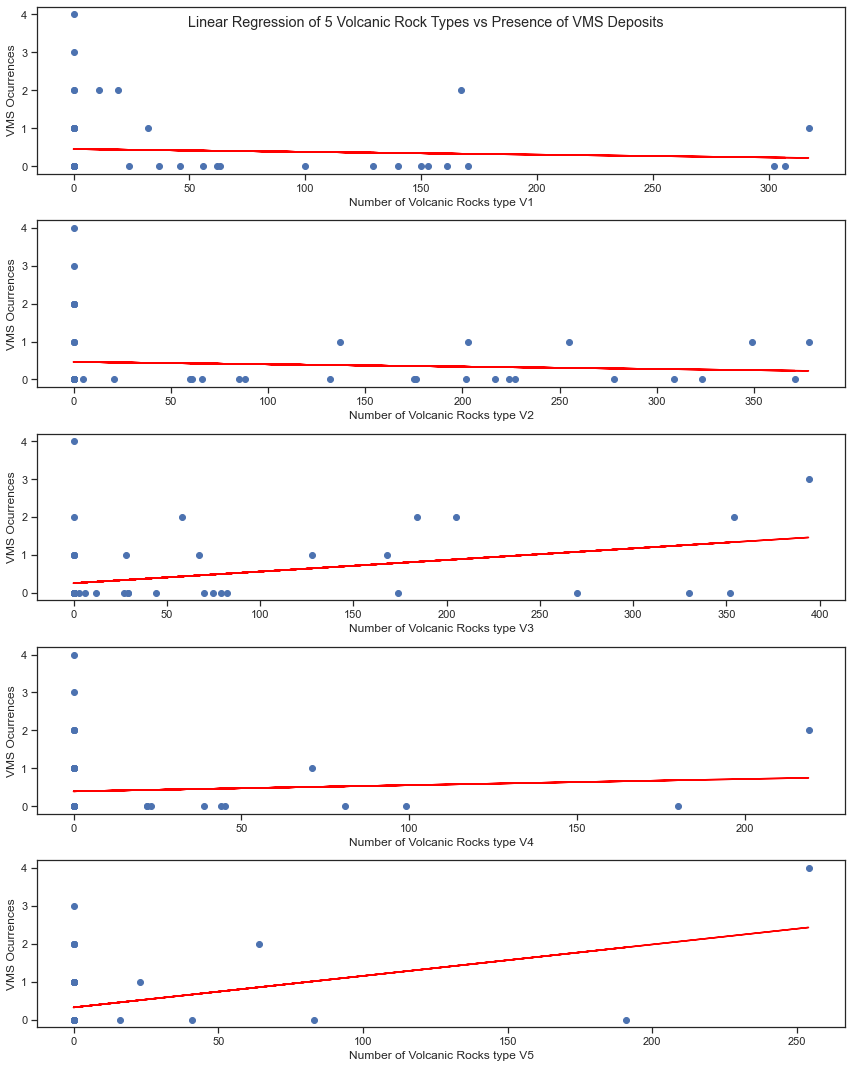

In [115]:


fig, axs = plt.subplots(5, 1, figsize=(12, 15), sharey=True)
Y = df["VMS Deposits"].values.reshape(-1,1)
for i, j in enumerate(["V1", "V2", "V3", "V4", "V5"]):
    rocks = df[j].values.reshape(-1,1)
    axs[i].scatter(rocks, Y)
    axs[i].plot(rocks, Y_preds[j], color="red")
    axs[i].set_ylabel("VMS Ocurrences")
    axs[i].set_xlabel(f"Number of Volcanic Rocks type {j}")
    
fig.tight_layout()
fig.suptitle('Linear Regression of 5 Volcanic Rock Types vs Presence of VMS Deposits')

In [120]:
scores

[0.00474315953889648,
 0.007091286223318782,
 0.1332536890911893,
 0.0059707945518094885,
 0.1727993627519857]

In [121]:
coeficients

[array([[-0.00073137]]),
 array([[-0.00061985]]),
 array([[0.00305897]]),
 array([[0.00162033]]),
 array([[0.0082958]])]

In [123]:
intercepts

[array([0.44648211]),
 array([0.4615232]),
 array([0.25515314]),
 array([0.39384706]),
 array([0.32375373])]

In [124]:
import statsmodels.api as sm

In [127]:
X = df[["V1", "V2", "V3", "V4", "V5"]] 
y = df["VMS Deposits"]
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit() 
predictions = model.predict(X)


model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           VMS Deposits   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     6.685
Date:                Sat, 26 Jun 2021   Prob (F-statistic):           6.51e-05
Time:                        19:35:32   Log-Likelihood:                -60.396
No. Observations:                  60   AIC:                             132.8
Df Residuals:                      54   BIC:                             145.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0910      0.172     -0.528      0.600      -0.436       0.254
V1             0.0013      0.001      1.040      0.303      -0.001       0.004
V2             0.0011      0.001      1.194      0.238      -0.001       0.003
V3             0.0041      0.001      4.242      0.000       0.002       0.006
V4             0.0032      0.002      1.350      0.183      -0.002       0.008
V5             0.0102      0.002      4.514      0.000       0.006       0.015
==============================================================================
Omnibus:                        3.339   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.188   Jarque-Bera (JB):                2.787
Skew:                           0.223   Prob(JB):                        0.248
Kurtosis:                       3.957   Cond. No.                         264.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

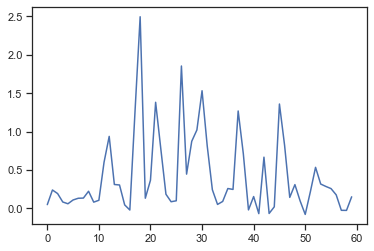

In [130]:
plt.plot(predictions)